In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"Restaurant_Reviews.tsv", delimiter="\t", quoting=3) 
df.sample(5)

,Review,Liked
453,I was so insulted.,0
707,Would not recommend to others.,0
305,This greedy corporation will NEVER see another...,0
584,After I pulled up my car I waited for another ...,0
766,One of the few places in Phoenix that I would ...,1


In [3]:
print(len(df[df.duplicated()]))
print('Removing Duplicates')
df.drop_duplicates(inplace=True)
print(len(df[df.duplicated()]))

4
Removing Duplicates
0


In [4]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

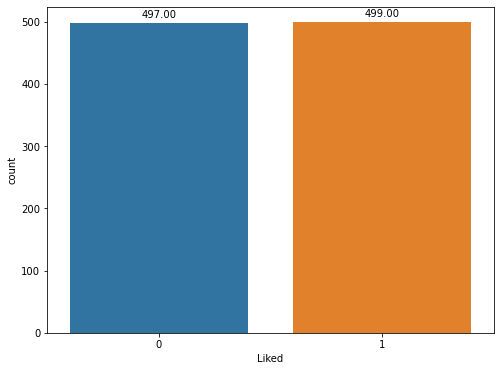

In [5]:
plt.figure(figsize=(8,6))
splot=sns.countplot(x="Liked", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [6]:
import contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'can not', "can't've": 'can not have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are',

In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

print('\n')
stop_words.discard('not')
print(stop_words)

{'were', 'should', 'why', 'in', 'their', 'does', 'having', 'with', "wasn't", 'be', 'about', 'into', 'only', 'ourselves', 'a', "mightn't", 'until', 'for', 'd', 'yourselves', "don't", 'by', "shouldn't", 'this', 'from', 'i', 'same', 'more', "isn't", 'they', 'shouldn', 'couldn', 'the', 'that', 'nor', 'what', 'itself', 'when', "you'd", 'can', 'other', 'our', 'you', 'he', 'now', 'ours', 'out', 'all', 'theirs', 'each', 'aren', 'but', 'don', 'and', "mustn't", "it's", 'who', 'was', 'very', 'most', "doesn't", 'before', 've', 'doing', 'up', 'them', 'herself', 'whom', 'weren', 'an', 'there', 'wouldn', 'hers', 'm', 'once', 'through', 'o', "you'll", 'any', "aren't", 'hasn', 'over', 's', 'will', 'my', 'being', 'isn', 'themselves', "shan't", 'between', "should've", "didn't", 'how', 'been', 'her', "wouldn't", 'above', 'here', 'so', 'himself', 'both', "that'll", 'is', 'against', 'few', 'didn', 'it', 'did', 'we', "you've", 'she', 'your', 'during', 'which', 'no', 'him', 'those', "she's", 'mightn', 'ain', 

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [9]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
def process(sent):
    sent = contractions.fix(sent)
    sent = sent.lower()
    sent = re.sub(r'[^\w\s]','', sent) 
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)
            
    tokens = [tok for tok in tokens if tok not in stop_words]
    tokens = [tok for tok in tokens if tok not in string.punctuation]

    tokens = ' '.join(tokens)
    return tokens

In [11]:
df['Review'] = df['Review'].apply(lambda x: process(x))

In [12]:
df.head()

,Review,Liked
0,wow love place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stop late may bank holiday rick steve recommen...,1
4,selection menu great price,1


In [13]:
df.to_csv('Restaurant_Reviews_2.csv',index=False)

In [14]:
from wordcloud import WordCloud, STOPWORDS 

def cloud_plot(df,col,stopwords):
    text = " ".join(review for review in df[col].astype(str))
    print('There are total {} words in your vocab'.format(len(text)))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def word_cloud(df,col,label,stopwords=set(STOPWORDS)):
    df[col] = df[col].str.lower()
    print('Word Cloud for entire data:-')
    cloud_plot(df,col,stopwords)
    labels = df[label].unique().tolist()
    for i in labels:
        print('\n*************************************************')
        print('Word Cloud for class label = ',i)
        data = df[df[label]==i]
        cloud_plot(data,col,stopwords) 

In [15]:
df.columns

Index(['Review', 'Liked'], dtype='object')

Word Cloud for entire data:-
There are total 36203 words in your vocab


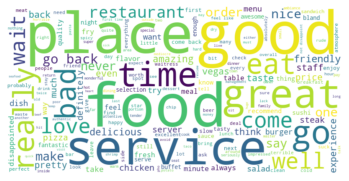


*************************************************
Word Cloud for class label =  1
There are total 17773 words in your vocab


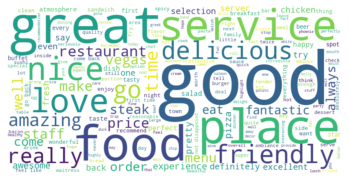


*************************************************
Word Cloud for class label =  0
There are total 18429 words in your vocab


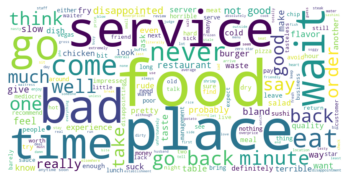

In [16]:
col = 'Review'
label = 'Liked'
word_cloud(df,col,label)